# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info (including a 'valid' cities list to remove items that failed)
cities_valid = []
lat = []
lng = []
temp = []
clouds = []
wind = []
country = []
humidity = []
max_temp = []
date = []

#count variable for reduction in index
count = 0

#total length of 'cities' variable for reporting
len_cities = len(cities)

# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities,start=1):
    try:
        response = requests.get(query_url + city).json()
        cities_valid.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        date.append(response['dt'])
        #reduce index based on the number of cities not found
        index = index - count
        print(f'Processing record for number {index} | {city}')
    except KeyError:
        print("City not found. Skipping...")
        #variable to total the number of cities not found (and reduce index accordingly)
        count = count + 1

print(f"---------------------------------------------------------------------------------------------------------------")
print(f"Data Retrieval Complete -- {len_cities} total records | {index} records located | {count} records not found")
print(f"---------------------------------------------------------------------------------------------------------------")

Processing record for number 1 | kaitangata
Processing record for number 2 | bathsheba
Processing record for number 3 | hermanus
Processing record for number 4 | rikitea
Processing record for number 5 | ponta do sol
Processing record for number 6 | mamakan
Processing record for number 7 | oussouye
Processing record for number 8 | poum
Processing record for number 9 | kapaa
Processing record for number 10 | punta arenas
Processing record for number 11 | varamin
Processing record for number 12 | samarai
City not found. Skipping...
Processing record for number 13 | coquimbo
Processing record for number 14 | bage
Processing record for number 15 | nishihara
Processing record for number 16 | arraial do cabo
Processing record for number 17 | ushuaia
Processing record for number 18 | otane
Processing record for number 19 | tocopilla
Processing record for number 20 | grand-santi
Processing record for number 21 | acarau
Processing record for number 22 | oruro
Processing record for number 23 | yu

City not found. Skipping...
Processing record for number 178 | cidreira
Processing record for number 179 | vilhena
Processing record for number 180 | camocim
City not found. Skipping...
Processing record for number 181 | kangaatsiaq
Processing record for number 182 | saint-philippe
Processing record for number 183 | alta floresta
Processing record for number 184 | ilulissat
Processing record for number 185 | ibra
Processing record for number 186 | matagami
Processing record for number 187 | karratha
Processing record for number 188 | norman wells
Processing record for number 189 | harper
Processing record for number 190 | esperance
City not found. Skipping...
Processing record for number 191 | koson
Processing record for number 192 | isangel
Processing record for number 193 | dawei
Processing record for number 194 | san quintin
Processing record for number 195 | teya
Processing record for number 196 | huamachuco
Processing record for number 197 | kuusamo
Processing record for number 19

Processing record for number 354 | banswara
Processing record for number 355 | romitan
Processing record for number 356 | pangnirtung
Processing record for number 357 | salinopolis
Processing record for number 358 | grahamstown
Processing record for number 359 | maceio
Processing record for number 360 | prince rupert
Processing record for number 361 | dali
Processing record for number 362 | zlitan
Processing record for number 363 | yaan
Processing record for number 364 | lengshuitan
Processing record for number 365 | the valley
Processing record for number 366 | gushikawa
Processing record for number 367 | san cristobal
Processing record for number 368 | linxi
Processing record for number 369 | kurchum
Processing record for number 370 | hervey bay
Processing record for number 371 | shahr-e babak
City not found. Skipping...
Processing record for number 372 | surskoye
Processing record for number 373 | paamiut
Processing record for number 374 | shihezi
Processing record for number 375 | 

Processing record for number 531 | half moon bay
Processing record for number 532 | staraya poltavka
Processing record for number 533 | mayna
City not found. Skipping...
Processing record for number 534 | coruripe
Processing record for number 535 | alice springs
Processing record for number 536 | hay river
Processing record for number 537 | san jose
Processing record for number 538 | zolotukhino
Processing record for number 539 | houston
Processing record for number 540 | sosnovo-ozerskoye
Processing record for number 541 | pisco
Processing record for number 542 | shache
Processing record for number 543 | sakaiminato
Processing record for number 544 | bacolod
Processing record for number 545 | pozo colorado
Processing record for number 546 | luanda
Processing record for number 547 | vila franca do campo
Processing record for number 548 | chumikan
Processing record for number 549 | bestobe
Processing record for number 550 | klaten
Processing record for number 551 | nador
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
#Create data variable to hold list variables (populated in cell above) for dataframe creation
data = {'City':cities_valid,
        'Cloudiness': clouds, 
        'Country':country,
        'Date':date,
        'Humidity':humidity,
        'Lat':lat,
        'Lng':lng,
        'Max_Temp':max_temp,
        'Wind_Speed':wind}

#create dataframe 'weather_call_df' using 'data' variable
weather_call_df = pd.DataFrame(data)

In [43]:
#count number of entries in each field - aligning it to the count of records displayed as valid (568)
weather_call_df.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max_Temp      568
Wind_Speed    568
dtype: int64

In [46]:
#display 'weather_call_df' dataframe head
weather_call_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Kaitangata,100,NZ,1580699313,96,-46.28,169.85,18.89,1.79
1,Bathsheba,20,BB,1580699313,78,13.22,-59.52,26.00,5.70
2,Hermanus,0,ZA,1580699136,95,-34.42,19.23,20.00,2.24
3,Rikitea,97,PF,1580699313,79,-23.12,-134.97,26.10,6.58
4,Ponta do Sol,20,PT,1580699314,82,32.67,-17.10,20.00,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

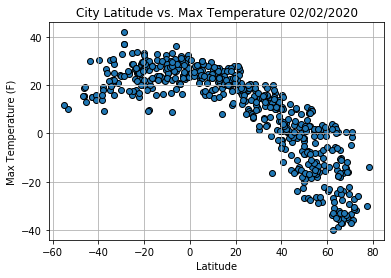

In [55]:
#Create Scatterplot of latitude versus max temperature with title, labels, gridlines
plt.scatter(weather_call_df['Lat'],weather_call_df['Max_Temp'],marker='o',edgecolors='black')
plt.title('City Latitude vs. Max Temperature 02/02/2020')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

#export scatterplot to png file
plt.savefig('Latitude vs. Temperature Plot.png')

#display scatterplot
plt.show()

#### Latitude vs. Humidity Plot

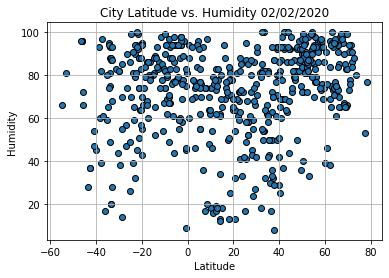

In [60]:
#Create Scatterplot of latitude versus humidity with title, labels, gridlines
plt.scatter(weather_call_df['Lat'],weather_call_df['Humidity'],marker='o',edgecolors='black')
plt.title('City Latitude vs. Humidity 02/02/2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

#export scatterplot to png file
plt.savefig('Latitude vs. Humidity Plot.png')

#display scatterplot
plt.show()

#### Latitude vs. Cloudiness Plot

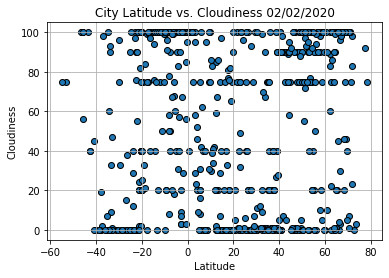

In [61]:
#Create Scatterplot of latitude versus cloudiness with title, labels, gridlines
plt.scatter(weather_call_df['Lat'],weather_call_df['Cloudiness'],marker='o',edgecolors='black')
plt.title('City Latitude vs. Cloudiness 02/02/2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

#export scatterplot to png file
plt.savefig('Latitude vs. Cloudiness Plot.png')

#display scatterplot
plt.show()

#### Latitude vs. Wind Speed Plot

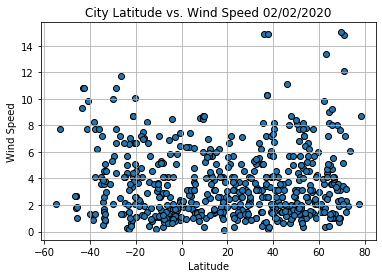

In [62]:
#Create Scatterplot of latitude versus wind speed with title, labels, gridlines
plt.scatter(weather_call_df['Lat'],weather_call_df['Wind_Speed'],marker='o',edgecolors='black')
plt.title('City Latitude vs. Wind Speed 02/02/2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

#export scatterplot to png file
plt.savefig('Latitude vs. Wind Speed Plot.png')

#display scatterplot
plt.show()

## Linear Regression

In [192]:
# OPTIONAL: Create a function to create Linear Regression plots, save to PNG based on user-provided title, and show
def regress_lin(x,y):
    plt.scatter(x,y,edgecolors='black')
    ylim = min(y)
    xlim = min(x)
    title = input('What would you like to call the file?')
    reg = linregress(x,y)
    plt.plot(x,x*reg[0]+reg[1],color='r')
    plt.text(xlim,ylim,f'y={reg[0]}x + {reg[1]}',color='r')
    plt.title(f'{str(x.name)} vs. {str(y.name)}')
    plt.xlabel(f'{str(x.name)}')
    plt.ylabel(f'{str(y.name)}')
    plt.grid()
    plt.savefig(f'{title}.png')
    plt.show()
    print(reg)
    return

In [193]:
# Create Northern Hemisphere DataFrames using conditional .loc
northern_df = weather_call_df.loc[weather_call_df['Lat'] > 0]

# Create Southern Hemisphere DataFrames using conditional .loc
southern_df = weather_call_df.loc[weather_call_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

What would you like to call the file?Northern Max Temp vs. Latitude LinReg


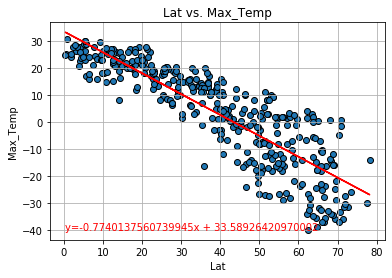

LinregressResult(slope=-0.7740137560739945, intercept=33.58926420970002, rvalue=-0.8649052578209188, pvalue=1.661217948520971e-115, stderr=0.02307321681578354)


In [194]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(northern_df['Lat'],northern_df['Max_Temp'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

What would you like to call the file?Southern Max Temp vs. Latitude LinReg


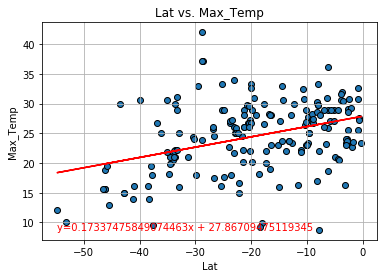

LinregressResult(slope=0.17337475849074463, intercept=27.86709475119345, rvalue=0.38261873124576534, pvalue=6.509404721390786e-08, stderr=0.030779511312529206)


In [195]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(southern_df['Lat'],southern_df['Max_Temp'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

What would you like to call the file?Northern Humidity vs. Latitude LinReg


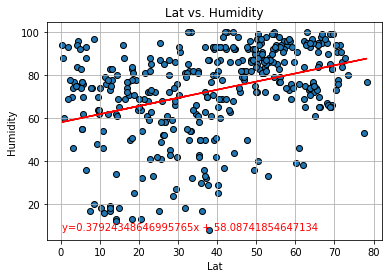

LinregressResult(slope=0.37924348646995765, intercept=58.08741854647134, rvalue=0.3601285622784274, pvalue=4.13532976703005e-13, stderr=0.050463492149834206)


In [196]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(northern_df['Lat'],northern_df['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

What would you like to call the file?Southern Humidity vs. Latitude LinReg


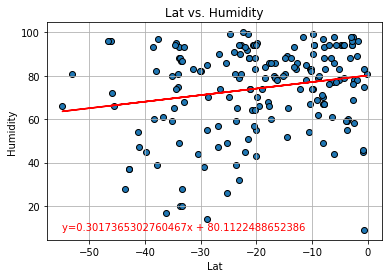

LinregressResult(slope=0.3017365302760467, intercept=80.1122488652386, rvalue=0.1951373641999833, pvalue=0.007442903973400978, stderr=0.11149910688658517)


In [197]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(southern_df['Lat'],southern_df['Humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

What would you like to call the file?Northern Cloudiness vs. Latitude LinReg


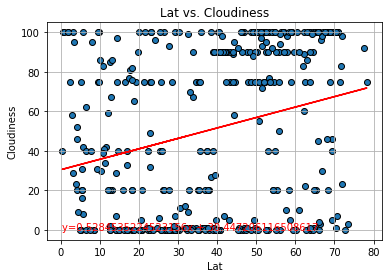

LinregressResult(slope=0.5284535224523156, intercept=30.447206116508617, rvalue=0.2577084236810108, pvalue=3.3940366717219057e-07, stderr=0.10177376205928079)


In [198]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(northern_df['Lat'],northern_df['Cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

What would you like to call the file?Southern Cloudiness vs. Latitude LinReg


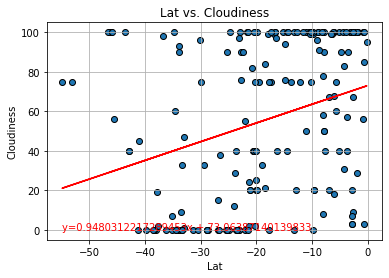

LinregressResult(slope=0.9480312217289453, intercept=73.06387140139833, rvalue=0.3008416217437001, pvalue=2.8680738290365017e-05, stderr=0.22095246456927284)


In [199]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(southern_df['Lat'],southern_df['Cloudiness'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

What would you like to call the file?Northern Wind Speed vs. Latitude LinReg


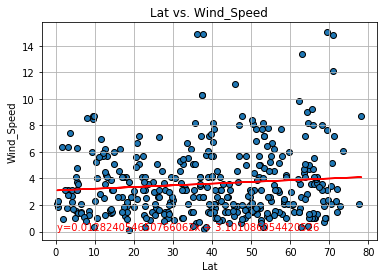

LinregressResult(slope=0.012824054650766062, intercept=3.101086054420526, rvalue=0.09890141849384237, pvalue=0.053747392276426546, stderr=0.006627790231960089)


In [200]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(northern_df['Lat'],northern_df['Wind_Speed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

What would you like to call the file?Southern Wind Speed vs. Latitude LinReg


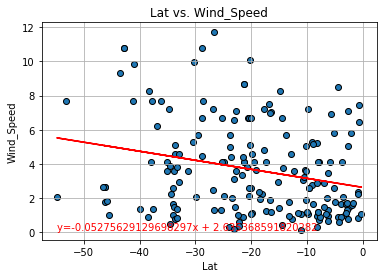

LinregressResult(slope=-0.05275629129698297, intercept=2.635368591820282, rvalue=-0.2541641486041522, pvalue=0.00044783879942983764, stderr=0.0147595433670888)


In [201]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(southern_df['Lat'],southern_df['Wind_Speed'])